In [30]:
pip install quandl

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle
import quandl

In [32]:
df=quandl.get('WIKI/GOOGL')

In [33]:
df.shape

(3424, 12)

In [34]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [35]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [36]:
df=df[[ u'Adj. Open', u'Adj. High', u'Adj. Low', u'Adj. Close',
       u'Adj. Volume']]

In [37]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [38]:
df.isna().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [39]:
df.describe()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adj. Open    3424 non-null   float64
 1   Adj. High    3424 non-null   float64
 2   Adj. Low     3424 non-null   float64
 3   Adj. Close   3424 non-null   float64
 4   Adj. Volume  3424 non-null   float64
dtypes: float64(5)
memory usage: 160.5 KB


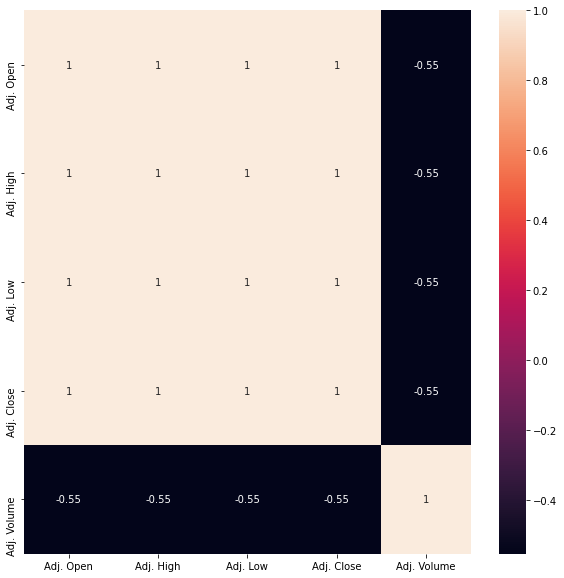

In [41]:
##Feature Selection
plt.figure(figsize=(10,10))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)

In [42]:
##Preprocessing
##High Low Percentage 
df['HL_PCT']=((df['Adj. High']-df['Adj. Low'])/df['Adj. Close'])*100

In [43]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792


In [44]:
df['PCT_CHANGE']=((df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'])*100

In [45]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_CHANGE
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [46]:
df_new=df[['Adj. Close','Adj. Volume','HL_PCT','PCT_CHANGE']]

In [47]:
df_new.head()

,Adj. Close,Adj. Volume,HL_PCT,PCT_CHANGE
Date,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968
2004-08-20,54.322689,22834300.0,7.921706,7.227007
2004-08-23,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,53.164113,9188600.0,3.886792,1.183658


In [74]:
X=df[['Adj. Volume','HL_PCT','PCT_CHANGE']]
Y=df[['Adj. Close']]

In [75]:
from sklearn.preprocessing import scale
X_new=(scale(X))
X_new

array([[ 4.46712802,  4.25846492,  0.23254018],
       [ 1.8207495 ,  4.15018674,  4.81828847],
       [ 1.26561472,  1.3780063 , -0.79917922],
       ...,
       [-0.65539548,  1.40180729, -1.55184968],
       [-0.55124957,  1.78591425,  0.23733959],
       [-0.59144015,  3.23683162, -3.54051775]])

In [50]:
X_df=pd.DataFrame(X_new,columns=['Adj. Volume','HL_PCT','PCT_CHANGE'])

In [52]:
X_df.head()

,Adj. Volume,HL_PCT,PCT_CHANGE
0,4.467128,4.258465,0.232540
1,1.820750,4.150187,4.818288
2,1.265615,1.378006,-0.799179
3,0.900779,3.960757,-3.787989
4,0.166125,1.261625,0.803058


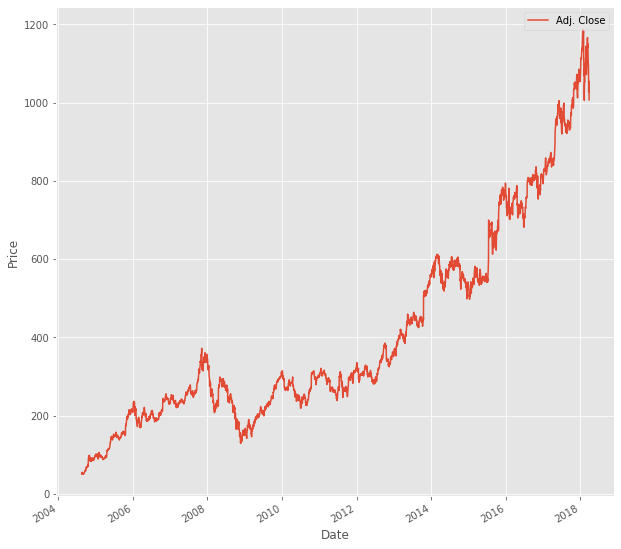

In [70]:
plt.figure(figsize=(10,10))
style.use('ggplot')
df_new['Adj. Close'].plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_df,Y,test_size=0.2,random_state=2)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2739, 3)
(685, 3)
(2739, 1)
(685, 1)


In [78]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred= lr_model.predict(X_test)

In [85]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.3247157791718921
